In [33]:
import sqlite3
db = sqlite3.connect("data.db")

In [46]:
import matplotlib.pyplot as plt

In [3]:
db.execute("""
CREATE TABLE films (
film_id INTEGER PRIMARY KEY,
rank TEXT,
trend TEXT,
season INTEGER,
episode INTEGER,
name TEXT,
start INTEGER,
total_votes TEXT,
average_rating REAL           
)
""")

In [5]:
import json
from sys import exit
films = []
try:
    json_file = open("OnePiecejson.json", "r")
except FileNotFoundError:
    print("Datei nicht gefunden.")
    exit()

try:
    films = json.load(json_file, object_hook=lambda obj: list(obj.values()))
except json.JSONDecodeError as e:
    print(f"Fehler im JSON-Code: {e}")
    exit()

try:
    db = sqlite3.connect("data.db")
    nd = 0 
    for film in films:
        db.execute("""INSERT INTO films
                   (rank, trend, season, episode, name, start, total_votes, average_rating)
                   VALUES(?,?,?,?,?,?,?,?)""",
                   [film[1], film[2], film[3],film[4], film[5],film[6], film[7], film[8]])
        nd+=1
    db.commit()
    result = db.execute("SELECT COUNT(*) FROM films")
    number = result.fetchone()[0]
    print(number)
    print(nd)

except sqlite3.Error as e:
    print(f"Datenbankfehler: {e}")
    exit()

958
958


In [ ]:
import sqlite3
db = sqlite3.connect("data.db")

In [6]:
result = db.execute("""SELECT * FROM films LIMIT 3""")
result.fetchall()


[(1,
  '24,129',
  '18',
  1,
  1,
  "I'm Luffy! The Man Who Will Become the Pirate King!",
  1999,
  '647',
  7.6),
 (2,
  '29,290',
  '11',
  1,
  2,
  'The Great Swordsman Appears! Pirate Hunter, Roronoa Zoro',
  1999,
  '473',
  7.8),
 (3,
  '32,043',
  '7',
  1,
  3,
  "Morgan vs. Luffy! Who's This Beautiful Young Girl?",
  1999,
  '428',
  7.7)]

In [7]:

result = db.execute("""SELECT name, rank FROM films LIMIT 3""")

res = result.fetchall()


In [8]:
res

[("I'm Luffy! The Man Who Will Become the Pirate King!", '24,129'),
 ('The Great Swordsman Appears! Pirate Hunter, Roronoa Zoro', '29,290'),
 ("Morgan vs. Luffy! Who's This Beautiful Young Girl?", '32,043')]

In [89]:

result = db.execute("""SELECT * FROM films
WHERE rank > 8.5""")
r = result.fetchall()


In [24]:
len(r)

275

In [27]:
result = db.execute("""SELECT * FROM films
WHERE rank > 8.5 AND start >2016""")
r = result.fetchall()

In [28]:
len(r)

82

In [ ]:
db.commit()

In [29]:
import pandas as pd

In [39]:
df = pd.read_sql('SELECT * FROM films', db)

In [40]:
df.describe()

,film_id,season,episode,start,average_rating
count,958.000000,958.0,958.000000,958.000000,958.000000
mean,479.500000,1.0,479.500000,2010.231733,7.796555
std,276.695079,0.0,276.695079,6.049997,0.589670
min,1.000000,1.0,1.000000,1999.000000,5.600000
25%,240.250000,1.0,240.250000,2005.000000,7.500000
50%,479.500000,1.0,479.500000,2010.000000,7.800000
75%,718.750000,1.0,718.750000,2015.000000,8.200000
max,958.000000,1.0,958.000000,2021.000000,9.600000


In [41]:
df.dtypes

film_id             int64
rank               object
trend              object
season              int64
episode             int64
name               object
start               int64
total_votes        object
average_rating    float64
dtype: object

In [42]:
df.head()

,film_id,rank,trend,season,episode,name,start,total_votes,average_rating
0,1,"24,129",18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,2,"29,290",11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,3,"32,043",7,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7
3,4,"28,818",8,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449,8.1
4,5,"37,113",4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370,7.5


In [44]:
df.drop(["season", "rank"],axis=1,inplace=True)

In [45]:
df.columns

Index(['film_id', 'trend', 'episode', 'name', 'start', 'total_votes',
       'average_rating'],
      dtype='object')

In [76]:
df['total_votes'] = df['total_votes'].str.replace(',', '').astype(int)


In [77]:
v_pro_year = df.groupby('start').agg({'total_votes':'sum'})

In [78]:
v_pro_year


,total_votes
start,
1999,3410
2000,11793
2001,8583
2002,8012
2003,5784
2004,5866
2005,5819
2006,5666
2007,6707


Text(0, 0.5, 'Votes')

<Figure size 800x500 with 0 Axes>

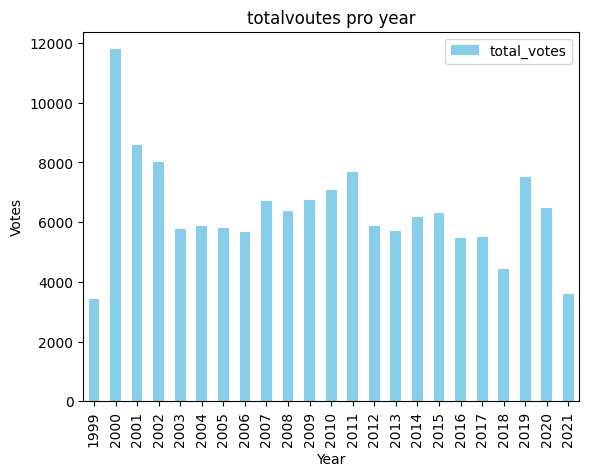

In [79]:

plt.figure(figsize=(8, 5))
v_pro_year.plot(kind='bar', color='skyblue')
plt.title('totalvoutes pro year')
plt.xlabel('Year')
plt.ylabel('Votes')


In [82]:
films_pro_year = df.groupby('start').size()

Text(0, 0.5, 'Number')

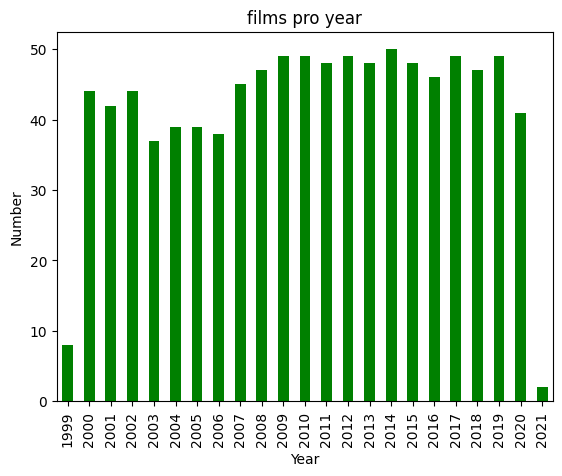

In [86]:
films_pro_year.plot(kind='bar', color='green')
plt.title('films pro year')
plt.xlabel('Year')
plt.ylabel('Number')

In [80]:
conn = sqlite3.connect('new_db.db')

In [81]:
df.to_sql('new_films_tabelle', conn, index=False, if_exists='replace')

958

In [ ]:
db.close()

In [87]:
conn.close()